# LEAD SCORING CASE STUDY

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Supressing Warnings.

import warnings
warnings.filterwarnings("ignore")

# Importing Necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the Dataset.

leads_data = pd.read_csv("Leads.csv")

## Analysing the dataset

In [3]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.shape

(9240, 37)

In [5]:
# Let's check the statistical aspects of the dataframe.

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's check the basic info of each column.

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Total null values present in the dataset
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- Removing the columns having more than 40% of null values as building models with those columns wont be reliable.

### Data Preparation

In [8]:
# Dropping "Prospect ID" and "Lead Number" column as it wont add value.

leads_data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [9]:
# Replacing the level "Select" in categorical variables with NaN values.

leads_data = leads_data.replace("Select", np.nan)

In [10]:
# Dropping columns with more than 40% missing values.

cols_to_drop = [cols for cols in leads_data.columns if((100*(leads_data[cols].isnull().sum()/len(leads_data.index))) >= 40)]

leads_data.drop(cols_to_drop, axis = 1, inplace = True)

In [11]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [12]:
# Dropping "Country" and "City" columnns as it has more % of missing values
leads_data.drop(["Country", "City"], axis = 1, inplace = True)

### Imputing Specialization column

In [13]:
leads_data["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [14]:
leads_data["Specialization"] = leads_data["Specialization"].replace(np.nan, "Not Given")

### Imputing "What is your current occupation" column

In [15]:
leads_data["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
# Replacing NaN values in "What is your current occupation" column with the Mode value in the column.

leads_data["What is your current occupation"] = leads_data["What is your current occupation"].replace(np.nan, "Unemployed")

### Imputing "What matters most to you in choosing a course" column

In [17]:
leads_data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# Replacing NaN values in "What matters most to you in choosing a course" column with the new category "not given" in the column.

leads_data["What matters most to you in choosing a course"] = leads_data["What matters most to you in choosing a course"].replace(np.nan, "Not Given")

### Imputing "Tags" column

In [19]:
# Let's see the value counts of "Tags" column.

leads_data["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
# Replacing NaN values in "Tags" column with a new category "Not given".

leads_data["Tags"] = leads_data["Tags"].replace(np.nan, "Not Given")

In [21]:
# Dropping Rows having NaN values.

leads_data = leads_data[~pd.isnull(leads_data["Lead Source"])]
leads_data = leads_data[~pd.isnull(leads_data["TotalVisits"])]
leads_data = leads_data[~pd.isnull(leads_data["Page Views Per Visit"])]
leads_data = leads_data[~pd.isnull(leads_data["Last Activity"])]

In [22]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [23]:
for col in leads_data.columns:
    print("Column ",col)
    print(leads_data[col].value_counts(dropna=False))
    print("******************************")

Column  Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
******************************
Column  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
******************************
Column  Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64
******************************
Column  Do Not Call
No     9072
Yes       2
Name: D

In [24]:
# Dropping columns as these categorical columns marks majority for particular category

cols = ["Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

leads_data.drop(cols, axis = 1, inplace = True)

In [25]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [26]:
# numerical_columns = leads_data.describe().columns
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


### Outliers Treatment

In [27]:
def outliers_removal(column):
    Q1 = leads_data[column].describe().loc['25%']
    Q3 = leads_data[column].describe().loc['75%']
    IQR=Q3-Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1+1.5*IQR
    leads_data[column]=np.where(leads_data[column]>upper_bound,upper_bound,leads_data[column])
    leads_data[column]=np.where(leads_data[column]<lower_bound,lower_bound,leads_data[column])
    return

In [28]:
# Capping and Flooring the outliers.

for col in ["TotalVisits", "Page Views Per Visit"]:
    outliers_removal(col)

## EDA

### Univariate Analysis

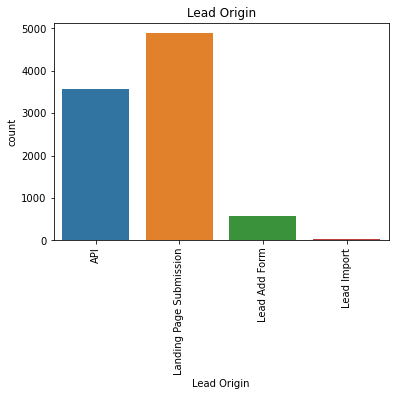

In [29]:
# CountPlot for "Lead Origin".

sns.countplot(leads_data["Lead Origin"])
plt.xticks(rotation=90)
plt.title("Lead Origin")
plt.show()

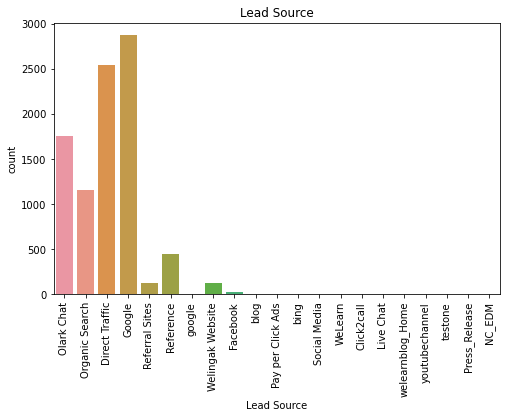

In [30]:
# CountPlot for "Lead Source".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Lead Source"])
plt.xticks(rotation=90)
plt.title("Lead Source")
plt.show()

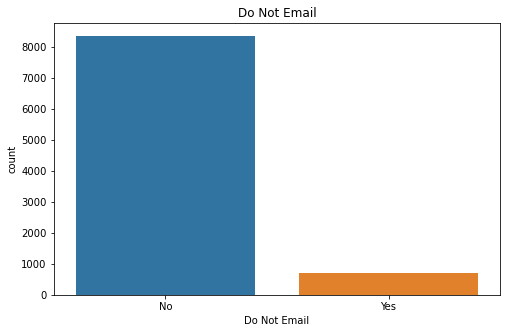

In [31]:
# CountPlot for "Do Not Email".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Do Not Email"])
plt.title("Do Not Email")
plt.show()

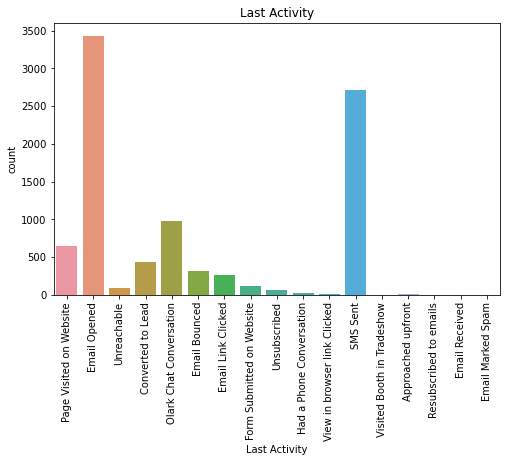

In [32]:
# CountPlot for "Last Activity".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Last Activity"])
plt.xticks(rotation=90)
plt.title("Last Activity")
plt.show()

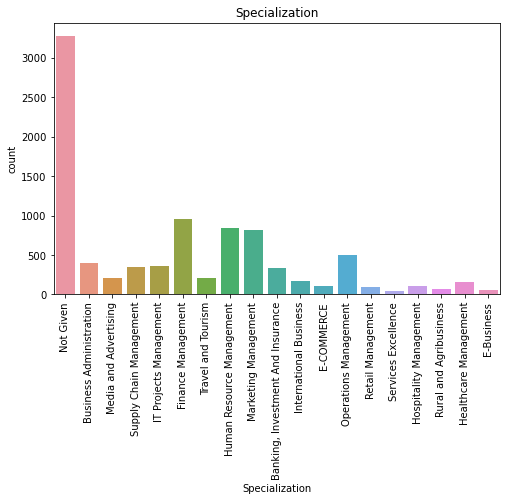

In [33]:
# CountPlot for "Specialization".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Specialization"])
plt.xticks(rotation=90)
plt.title("Specialization")
plt.show()

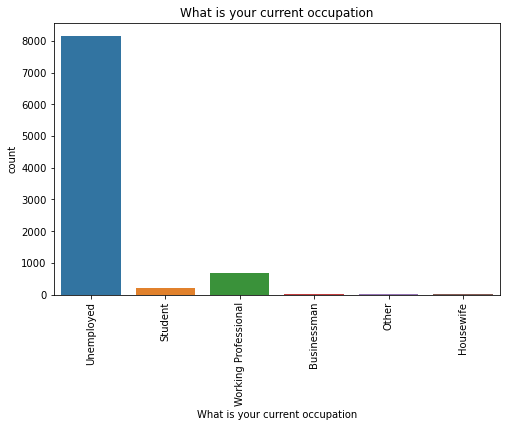

In [34]:
# CountPlot for "What is your current occupation".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["What is your current occupation"])
plt.xticks(rotation=90)
plt.title("What is your current occupation")
plt.show()

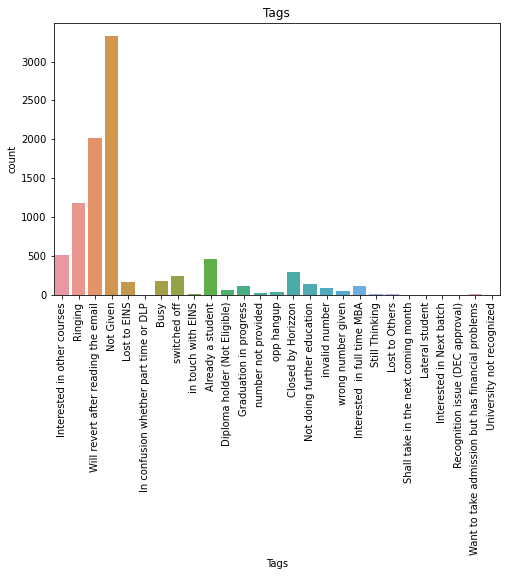

In [35]:
# CountPlot for "Tags".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Tags"])
plt.xticks(rotation=90)
plt.title("Tags")
plt.show()

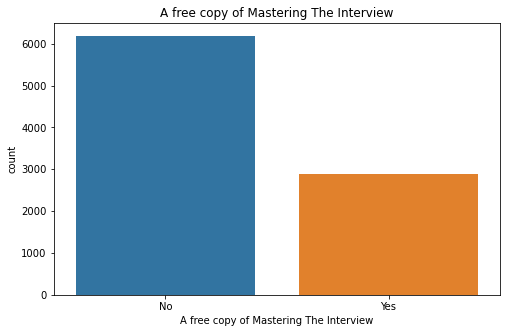

In [36]:
# CountPlot for "A free copy of Mastering The Interview".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")
plt.show()

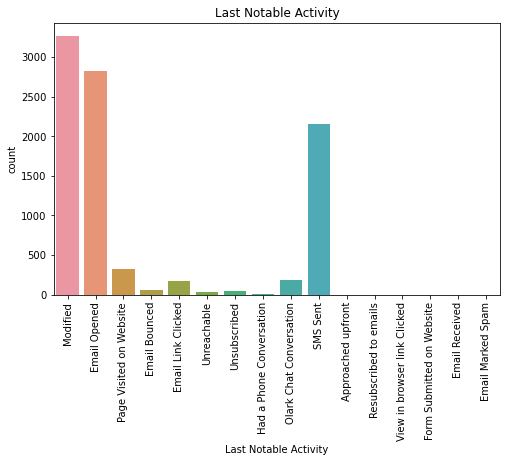

In [37]:
# CountPlot for "Last Notable Activity".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Last Notable Activity"])
plt.xticks(rotation=90)
plt.title("Last Notable Activity")
plt.show()

### Multivariate Analysis

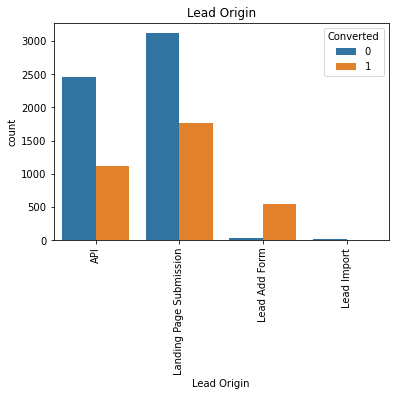

In [38]:
# Countplot for "Lead Origin" with Hue = "Coverted".

sns.countplot(data = leads_data, x = "Lead Origin", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Lead Origin")
plt.show()

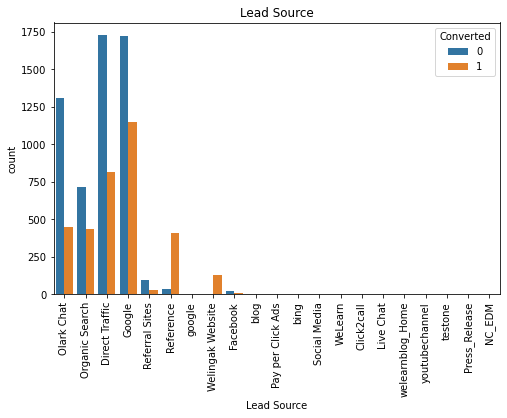

In [39]:
plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Lead Source", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Lead Source")
plt.legend(title = "Converted", loc = "upper right")
plt.show()

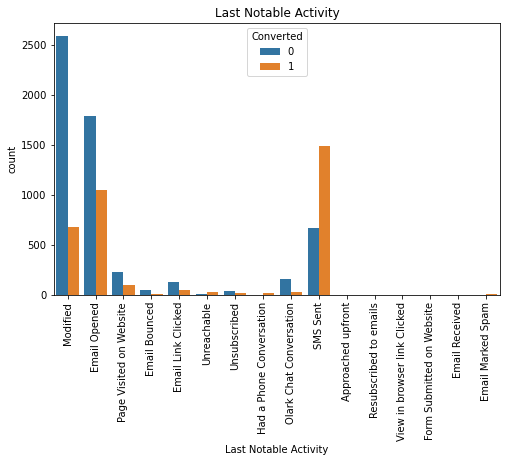

In [40]:
plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Last Notable Activity", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Last Notable Activity")
plt.show()

- Total number of leads generated by Direct Traffic and Google are the highest. They also have the highest converted leads.

- Leads through Reference are low in number, but they have a higher conversion rate.

- Numbers of leads from Olark Chat and Organic Search are high, but their conversion rates are low.
- Customers whose Last Notable Activity was either Email Opened or SMS Sent are having high number of leads. They also have higher converted leads.

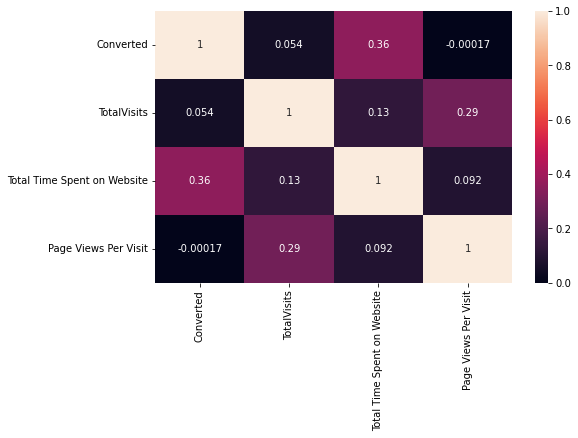

In [41]:
# Correlation HeatMap for numerical variables.

plt.figure(figsize = (8,5))
sns.heatmap(leads_data.corr(), annot=True)
plt.show()

In [42]:
# List of variables to map.

variablelist =  ["A free copy of Mastering The Interview", "Do Not Email"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[variablelist] = leads_data[variablelist].apply(binary_map)

In [43]:
dummy1 = pd.get_dummies(leads_data[["Lead Origin","What is your current occupation"]], drop_first=True)

# Adding Dummies to the main Dataframe.
leads_data = pd.concat([leads_data,dummy1], axis = 1)

In [44]:
dummy2 = pd.get_dummies(leads_data[["Specialization","Lead Source","Last Activity","Last Notable Activity","Tags"]], drop_first=True)

In [45]:
leads_data = pd.concat([leads_data,dummy2], axis = 1)

In [46]:
cols_drop = ["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation", "Tags", "Last Notable Activity"]
leads_data.drop(cols_drop, axis = 1, inplace = True)

### Train-Test Split

In [47]:
# Importing necessary libraries.

from sklearn.model_selection import train_test_split


In [48]:
# Putting feature variables to X.

y = leads_data.pop("Converted")
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
X = leads_data

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [51]:
X_train.shape

(6351, 108)

In [52]:
X_test.shape

(2723, 108)

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
# Scaling the variables.

scaler = StandardScaler()

Num_cols = ["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]

X_train[Num_cols] = scaler.fit_transform(X_train[Num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
3009,0,-0.291512,-0.160255,-0.349573,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.291512,-0.540048,-0.349573,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-0.291512,-0.888650,-0.349573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,-0.291512,1.643304,-0.349573,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,-0.291512,2.017593,-0.349573,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [55]:
# Importing Libraries.

import statsmodels.api as sm

In [56]:
# Importing and Running RFE with 15 variables as output.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True])

In [58]:
# list of all the features.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 78),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 37),
 ('What is your current occupation_Housewife', False, 55),
 ('What is your current occupation_Other', False, 53),
 ('What is your current occupation_Student', False, 11),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Working Professional', False, 34),
 ('Specialization_Business Administration', False, 67),
 ('Specialization_E-Business', False, 65),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_Finance Management', False, 46),
 ('Specialization_Healthcare Management', False, 71),
 ('Specialization_Hospitality Management', False, 70),
 ('Specialization_Human Resource Management', False, 66),
 ('Specia

In [59]:
rfe_selected_cols = X_train.columns[rfe.support_]

### Building Model 1

In [60]:
# Building Model 1.

X_train_sm = sm.add_constant(X_train[rfe_selected_cols])
model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = model_1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1348.5
Date:                Tue, 09 Aug 2022   Deviance:                       2696.9
Time:                        17:31:11   Pearson chi2:                 1.17e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9644      0.185    -16.064      0.000      -3.326      -2.603
Do Not Email                                -1.2136      0.249     -4.867      0.000      -1.702      -0.725
Lead Source_Welingak Website                 4.5221      0.737      6.132      0.000       3.077       5.967
Last Activity_SMS Sent                       1.3822      0.217      6.359      0.000       0.956       1.808
Last Notable Activity_Modified              -1.3953      0.150     -9.282      0.000      -1.690      -1.101
Last Notable Activity_SMS Sent               1.1435      0.252      4.542      0.000       0.650       1.637
Tags_Busy                                    1.9770      0.292      6.760      0.000       1.404       2.550
Tags_Closed by Horizzon                      8.4913      0.738     11.500      0.000       7.044       9.938
Tags_Lost to EINS                            7.8388      0.744     10.536      0.000       6.381       9.297
Tags_Not Given                               1.5848      0.188      8.416      0.000       1.216       1.954
Tags_Ringing                                -2.1562      0.304     -7.088      0.000      -2.752      -1.560
Tags_Will revert after reading the email     6.4683      0.251     25.779      0.000       5.977       6.960
Tags_invalid number                        -23.7428   2.45e+04     -0.001      0.999   -4.81e+04    4.81e+04
Tags_number not provided                   -23.5066   4.26e+04     -0.001      1.000   -8.35e+04    8.35e+04
Tags_switched off                           -2.1987      0.553     -3.978      0.000      -3.282      -1.116
Tags_wrong number given                    -23.5854   3.36e+04     -0.001      0.999   -6.58e+04    6.58e+04
============================================================================================================
"""

In [61]:
# Removing column having high p-value
rfe_selected_cols=rfe_selected_cols.drop('Tags_number not provided')

In [62]:
rfe_selected_cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Given',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

### Building Model 2

In [63]:
# Building Model 2.

X_train_sm = sm.add_constant(X_train[rfe_selected_cols])
model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = model_2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1351.0
Date:                Tue, 09 Aug 2022   Deviance:                       2702.1
Time:                        17:31:12   Pearson chi2:                 1.16e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0279      0.185    -16.328      0.000      -3.391      -2.664
Do Not Email                                -1.2277      0.248     -4.949      0.000      -1.714      -0.741
Lead Source_Welingak Website                 4.5217      0.737      6.132      0.000       3.076       5.967
Last Activity_SMS Sent                       1.3789      0.217      6.341      0.000       0.953       1.805
Last Notable Activity_Modified              -1.3921      0.150     -9.255      0.000      -1.687      -1.097
Last Notable Activity_SMS Sent               1.1255      0.251      4.475      0.000       0.633       1.618
Tags_Busy                                    2.0519      0.292      7.039      0.000       1.481       2.623
Tags_Closed by Horizzon                      8.5524      0.739     11.578      0.000       7.105      10.000
Tags_Lost to EINS                            7.9011      0.744     10.615      0.000       6.442       9.360
Tags_Not Given                               1.6534      0.189      8.771      0.000       1.284       2.023
Tags_Ringing                                -2.0739      0.303     -6.845      0.000      -2.668      -1.480
Tags_Will revert after reading the email     6.5326      0.251     25.976      0.000       6.040       7.025
Tags_invalid number                        -22.6612   1.49e+04     -0.002      0.999   -2.92e+04    2.92e+04
Tags_switched off                           -2.1151      0.552     -3.832      0.000      -3.197      -1.033
Tags_wrong number given                    -22.5035   2.04e+04     -0.001      0.999      -4e+04    3.99e+04
============================================================================================================
"""

In [64]:
# Removing column having high p-value
rfe_selected_cols=rfe_selected_cols.drop('Tags_invalid number')

### Building Model 3

In [65]:
# Building Model 3.

X_train_sm = sm.add_constant(X_train[rfe_selected_cols])
model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = model_3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1359.3
Date:                Tue, 09 Aug 2022   Deviance:                       2718.7
Time:                        17:31:12   Pearson chi2:                 1.13e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2368      0.188    -17.205      0.000      -3.605      -2.868
Do Not Email                                -1.2200      0.247     -4.947      0.000      -1.703      -0.737
Lead Source_Welingak Website                 4.5128      0.737      6.124      0.000       3.068       5.957
Last Activity_SMS Sent                       1.3665      0.218      6.276      0.000       0.940       1.793
Last Notable Activity_Modified              -1.3836      0.151     -9.182      0.000      -1.679      -1.088
Last Notable Activity_SMS Sent               1.0748      0.251      4.286      0.000       0.583       1.566
Tags_Busy                                    2.2933      0.289      7.938      0.000       1.727       2.860
Tags_Closed by Horizzon                      8.7547      0.740     11.838      0.000       7.305      10.204
Tags_Lost to EINS                            8.1033      0.745     10.875      0.000       6.643       9.564
Tags_Not Given                               1.8762      0.189      9.912      0.000       1.505       2.247
Tags_Ringing                                -1.8111      0.299     -6.048      0.000      -2.398      -1.224
Tags_Will revert after reading the email     6.7416      0.253     26.608      0.000       6.245       7.238
Tags_switched off                           -1.8502      0.550     -3.365      0.001      -2.928      -0.773
Tags_wrong number given                    -21.2470   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
============================================================================================================
"""

In [66]:
# Removing column having high p-value
rfe_selected_cols=rfe_selected_cols.drop('Tags_wrong number given')


### Building Model 4

In [67]:
# Building Model 4.

X_train_sm = sm.add_constant(X_train[rfe_selected_cols])
model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = model_4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.6
Date:                Tue, 09 Aug 2022   Deviance:                       2725.3
Time:                        17:31:12   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3213      0.189    -17.572      0.000      -3.692      -2.951
Do Not Email                                -1.2292      0.246     -5.004      0.000      -1.711      -0.748
Lead Source_Welingak Website                 4.5121      0.737      6.123      0.000       3.068       5.956
Last Activity_SMS Sent                       1.3601      0.218      6.246      0.000       0.933       1.787
Last Notable Activity_Modified              -1.3811      0.151     -9.159      0.000      -1.677      -1.086
Last Notable Activity_SMS Sent               1.0598      0.251      4.230      0.000       0.569       1.551
Tags_Busy                                    2.3897      0.288      8.300      0.000       1.825       2.954
Tags_Closed by Horizzon                      8.8375      0.740     11.945      0.000       7.387      10.288
Tags_Lost to EINS                            8.1872      0.745     10.983      0.000       6.726       9.648
Tags_Not Given                               1.9663      0.189     10.383      0.000       1.595       2.337
Tags_Ringing                                -1.7079      0.298     -5.728      0.000      -2.292      -1.123
Tags_Will revert after reading the email     6.8274      0.254     26.892      0.000       6.330       7.325
Tags_switched off                           -1.7458      0.549     -3.180      0.001      -2.822      -0.670
============================================================================================================
"""

In [68]:
# Importing libraries.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
X = X_train[rfe_selected_cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Notable Activity_SMS Sent,6.13
2,Last Activity_SMS Sent,5.94
3,Last Notable Activity_Modified,1.70
8,Tags_Not Given,1.45
10,Tags_Will revert after reading the email,1.43
9,Tags_Ringing,1.15
0,Do Not Email,1.11
1,Lead Source_Welingak Website,1.05
5,Tags_Busy,1.05
6,Tags_Closed by Horizzon,1.05


In [70]:
# Removing feature having VIF > 5
vif_cols=rfe_selected_cols.drop("Last Notable Activity_SMS Sent")
vif_cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Given',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

### Building Model 5

In [71]:
# Building Model 5.

X_train_sm = sm.add_constant(X_train[vif_cols])
model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = model_5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.7
Date:                Tue, 09 Aug 2022   Deviance:                       2743.5
Time:                        17:31:12   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1991      0.184    -17.395      0.000      -3.560      -2.839
Do Not Email                                -1.2162      0.247     -4.932      0.000      -1.699      -0.733
Lead Source_Welingak Website                 4.4676      0.739      6.044      0.000       3.019       5.916
Last Activity_SMS Sent                       2.1569      0.109     19.769      0.000       1.943       2.371
Last Notable Activity_Modified              -1.8044      0.124    -14.572      0.000      -2.047      -1.562
Tags_Busy                                    2.3771      0.281      8.457      0.000       1.826       2.928
Tags_Closed by Horizzon                      9.0513      0.741     12.219      0.000       7.599      10.503
Tags_Lost to EINS                            8.3739      0.748     11.193      0.000       6.908       9.840
Tags_Not Given                               1.9193      0.187     10.267      0.000       1.553       2.286
Tags_Ringing                                -1.6126      0.295     -5.459      0.000      -2.192      -1.034
Tags_Will revert after reading the email     6.8806      0.256     26.897      0.000       6.379       7.382
Tags_switched off                           -1.6372      0.547     -2.994      0.003      -2.709      -0.565
============================================================================================================
"""

In [72]:
vif1 = pd.DataFrame()
X = X_train[vif_cols]
vif1['Features'] = X.columns
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
2,Last Activity_SMS Sent,1.65
7,Tags_Not Given,1.42
3,Last Notable Activity_Modified,1.41
9,Tags_Will revert after reading the email,1.36
8,Tags_Ringing,1.13
0,Do Not Email,1.11
1,Lead Source_Welingak Website,1.05
4,Tags_Busy,1.05
5,Tags_Closed by Horizzon,1.05
10,Tags_switched off,1.04


- Now all features VIF are very less and p-values are 0.
- Model 5 can be considered as our final model

### Prediction on train set: X_train_sm

In [73]:
y_train_pred = res5.predict(X_train_sm).values.reshape(-1)

In [74]:
# Creating y_train_pred_final df.

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_pred'] = y_train_pred
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID
0,0,0.217580,3009
1,0,0.076139,1012
2,0,0.011439,9226
3,1,0.706213,4750
4,1,0.996039,7987


In [75]:
# Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,Predicted
0,0,0.217580,3009,0
1,0,0.076139,1012,0
2,0,0.011439,9226,0
3,1,0.706213,4750,1
4,1,0.996039,7987,1


### ROC Curve

In [76]:
from sklearn import metrics

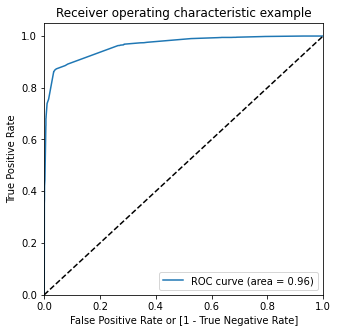

In [77]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])

- Higher the area under the ROC curve the better is your model. The value of ROC curve should be closer to 1, we have the area under ROC curve = 0.96.

### Finding optimal cut off point

In [78]:
# Creating columns with different probability cutoffs. 

Numbers = [float(x)/10 for x in range(10)]
for i in Numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.217580,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.076139,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011439,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.706213,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.996039,7987,1,1,1,1,1,1,1,1,1,1,1


In [79]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_data = pd.DataFrame(columns = ["prob","accuracy","sensi","speci"])
from sklearn.metrics import confusion_matrix

Num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in Num:
    CM_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(CM_1))
    accuracy = (CM_1[0,0]+CM_1[1,1])/total1
    
    speci = CM_1[0,0]/(CM_1[0,0]+CM_1[0,1])
    sensi = CM_1[1,1]/(CM_1[1,0]+CM_1[1,1])
    cutoff_data.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_data)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.819399  0.963205  0.729321
0.2   0.2  0.823020  0.962796  0.735467
0.3   0.3  0.924264  0.872854  0.956466
0.4   0.4  0.925681  0.865904  0.963124
0.5   0.5  0.925838  0.862633  0.965429
0.6   0.6  0.925681  0.861815  0.965685
0.7   0.7  0.925838  0.861815  0.965941
0.8   0.8  0.892773  0.737939  0.989757
0.9   0.9  0.876083  0.689289  0.993086


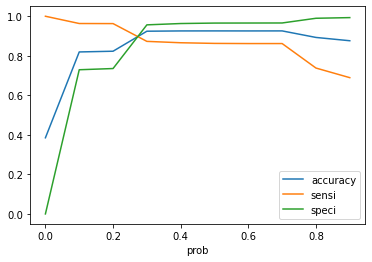

In [80]:
# Plotting accuracy, sensitivity and specificity for various probabilities.

cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The optimal cut-off is around 0.3

In [99]:
# Creating final_predicted column with 0.3 cutoff point.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.217580,3009,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.076139,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.011439,9226,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.706213,4750,1,1,1,1,1,1,1,1,1,0,0,1,71
4,1,0.996039,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [82]:
# Assigning Score to leads.

y_train_pred_final["Lead Score"] = y_train_pred_final.Converted_pred.map(lambda x: round(x*100))
y_train_pred_final[["Converted","Converted_pred","Prospect ID","final_predicted","Lead Score"]].head()

,Converted,Converted_pred,Prospect ID,final_predicted,Lead Score
0,0,0.217580,3009,0,22
1,0,0.076139,1012,0,8
2,0,0.011439,9226,0,1
3,1,0.706213,4750,1,71
4,1,0.996039,7987,1,100


### Metrics Evaluation

In [83]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9242638954495355

In [84]:
# Creating Confusion matrix 2.

confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_1

array([[3735,  170],
       [ 311, 2135]], dtype=int64)

In [85]:
# Creating TP, TN, FP, FN.

TP = confusion_1[1,1]
TN = confusion_1[0,0]
FP = confusion_1[0,1]
FN = confusion_1[1,0]

In [86]:
# Let's check the sensitivity.

TP / float(TP+FN)

0.8728536385936222

In [87]:
# Let's check the specificity.

TN / float(TN+FP)

0.9564660691421255

In [88]:
# Let's check the False Positive Rate - predicting customer as converted lead when the customer has not actually converted.

print(FP/ float(TN+FP))

0.04353393085787452


- From the Final Model (Model 5) we built we have the following observation values:
    - Accuracy : 92%
    - Sensitivity : 87%
    - Specificity : 95%
- These values show that the model is performing very well.

### Precision and Recall Score

In [89]:
# Importing Libraries.

from sklearn.metrics import precision_score, recall_score

In [90]:
# Precision Score.

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9262472885032538

In [91]:
# Recall Score.

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8728536385936222

### Precision and Recall Tradeoff.

In [92]:
# Importing Libraries.

from sklearn.metrics import precision_recall_curve

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

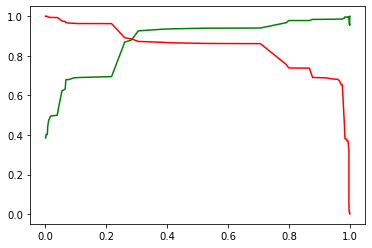

In [94]:
# Plotting the curve.

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predicting on test set: X_test

In [95]:
# Scaling the variables.

scaler = StandardScaler()

Num_cols = ["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]

X_test[Num_cols] = scaler.fit_transform(X_test[Num_cols])
X_test = X_test[vif_cols]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Given,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3271,0,0,0,0,0,0,0,1,0,0,0
1490,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,0,0,0,1,0,0,0
4216,0,0,0,1,0,1,0,0,0,0,0
3830,0,0,0,0,0,0,0,1,0,0,0


In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
y_test_pred = res5.predict(X_test_sm)
y_test_pred

3271    0.217580
1490    0.975434
7936    0.217580
4216    0.982839
3830    0.217580
          ...   
850     0.043762
2879    0.006670
6501    0.997095
7155    0.043762
376     0.043762
Length: 2723, dtype: float64

In [100]:
y_pred_final = pd.DataFrame()
y_pred_final['Converted_pred']=pd.DataFrame(y_test_pred.values.reshape(-1))


In [103]:
y_pred_final['Converted']= y_test.values.reshape(-1)
y_pred_final['Prospect ID'] = y_test.index


In [104]:
# Getting the final_predicted values with 0.4 cutoff point.

y_pred_final["final_predicted"] = y_pred_final.Converted_pred.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted_pred,Converted,Prospect ID,final_predicted
0,0.217580,0,3271,0
1,0.975434,1,1490,1
2,0.217580,0,7936,0
3,0.982839,1,4216,1
4,0.217580,0,3830,0
...,...,...,...,...
2718,0.043762,0,850,0
2719,0.006670,0,2879,0
2720,0.997095,1,6501,1
2721,0.043762,0,7155,0


### Model Evaluation

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score


In [106]:
accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.9225119353654058

In [107]:
print(classification_report(y_pred_final['Converted'], y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1734
           1       0.91      0.87      0.89       989

    accuracy                           0.92      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.92      0.92      0.92      2723



In [108]:
confusion2=confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion2

array([[1652,   82],
       [ 129,  860]], dtype=int64)

In [109]:
# Creating TP, TN, FP, FN.

TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [110]:
# Let's check the sensitivity.

TP / float(TP+FN)

0.8695652173913043

In [111]:
# Let's check the specificity.

TN / float(TN+FP)

0.9527104959630911

In [112]:
# Precision score.

precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.9129511677282378

In [113]:
# Recall Score.

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8695652173913043

In [ ]:
# Let's check the False Positive Rate - predicting customer as converted lead when the customer has not actually converted.

print(FP/ float(TN+FP))

- On running the model on test dataset we have the following observation values:
    - Accuracy : 92%
    - Sensitivity : 86.9%
    - Specificity : 95%

## Final Observation

### Train Dataset
- Accuracy : 92%
- Sensitivity : 87%
- Specificity : 95%
- Precision score: 92
- Recall score: 87

### Test Dataset
- Accuracy : 91.8%
- Sensitivity : 85%
- Specificity : 95%
- Precision score: 91
- Recall score: 86.9

### Feature Variables
- Last Activity_SMS Sent
- Tags_Not Given
- Last Notable Activity_Modified
- Tags_Will revert after reading the email
- Tags_Ringing
- Do Not Email
- Lead Source_Welingak Website
- Tags_Busy
- Tags_Closed by Horizzon
- Tags_switched off
- Tags_Lost to EINS